In [2]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [3]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion

#.To do
# 1. csv file read
# 2. remove csv header
# 3. split label and pixel value
# 4. convert to floats
    with open(filename) as training_file:
        file = csv.reader(training_file, delimiter=",") #df가 아니라서 header=None은 못쓰겠네
        
        # remove header
        next(file)
        
        # split labels and pixel values
        labels = []
        images = []
        for i in file:
            # The first value is the label
            labels.append(i[0])
            
            # The rest are the pixel values for that picture
            image_vector = i[1:785]
            image_array = np.array_split(image_vector, 28)
            images.append(image_array)
            
        # You are reading in strings, but need the values to be floats
        labels = np.array(labels).astype('float') # Should be float32?
        images = np.array(images).astype('float')
        
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

print(np.unique(testing_labels))
# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]


In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(rescale=1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)

print(len(np.unique(testing_labels)))
print(len(np.unique(training_labels)))

# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)
24
24


In [6]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Conv layers
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax') #왜 output neurons가 24가 아니라 26인지 모르겟군
])

# Compile Model. 
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the Model
# 디렉터리로 나눈게 아니니까 .flow_from_directory 말고 .flow 쓰기
# tf APIs에서 발췌
# flow(
#     x, y=None, batch_size=32, shuffle=True, sample_weight=None, seed=None,
#     save_to_dir=None, save_prefix='', save_format='png',
#     subset=None
# )
train_generator = train_datagen.flow(training_images, training_labels)
validation_generator = validation_datagen.flow(testing_images, testing_labels)

history = model.fit_generator(# Your Code Here (set 'epochs' = 2)
    train_generator,
    validation_data = validation_generator,
    epochs=2,
    verbose=1
)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
858/858 [==============================] - 58s 67ms/step - loss: 2.6488 - accuracy: 0.1969 - val_loss: 1.7527 - val_accuracy: 0.4279
Epoch 2/2
858/858 [==============================] - 53s 62ms/step - loss: 1.7645 - accuracy: 0.4326 - val_loss: 1.2668 - val_accuracy: 0.5732


[191.16383966891644, 0.44366983]

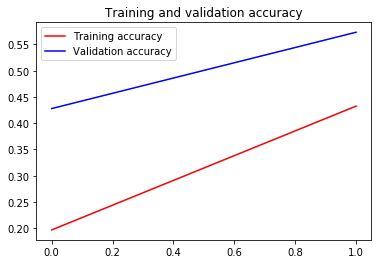

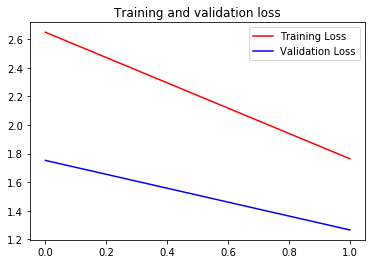

In [7]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [6]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [7]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

<IPython.core.display.Javascript object>

In [ ]:
# // %%javascript
# // IPython.notebook.session.delete();
# // window.onbeforeunload = null
# // setTimeout(function() { window.close(); }, 1000);

<IPython.core.display.Javascript object>